# **Exploratory Data Analysis: Hotel Booking Cancellations**

### **Project Overview**:

INN Hotels Group faces significant revenue loss due to booking cancellations. This project aims to develop a machine learning solution to predict cancellation likelihood, enabling proactive measures to mitigate losses.

### **Problem Statement**

- Current cancellation rate: 18% (all-time high)
- Annual revenue loss: ~$0.25 million
- No existing predictive mechanism

### **Objective**

Develop a ML model to forecast booking cancellation probabilities, allowing for:

1. Dynamic pricing strategies
2. Targeted retention campaigns
3. Optimized overbooking policies

By accurately predicting cancellations, INN Hotels Group can minimize inventory loss and maximize revenue.


**Note**: In this notebook, we will focus on Exploratory Data Analysis (EDA). That is, we will
- Identify key factors influencing hotel booking cancellations
- Analyze patterns in cancellation rates across various dimensions
- Visualize relationships between booking features and cancellations
- Prepare the groundwork for developing a predictive model


---

## 1. **Import necessary libraries**

In [2]:
# For reading and manipulating data
import pandas as pd
import numpy as np

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns


# Ignore all warnings
import warnings
warnings.filterwarnings("ignore")

## 2. **Load the dataset**

In [6]:
# Loading the data into a Pandas dataframe
hotel = pd.read_csv("../data/INNHotelsGroup.csv")

In [7]:
# Overview of the dataset
hotel.head(10)

,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,arrival_date,required_car_parking_space,no_of_week_nights,booking_status
0,224,Offline,0,65.00,2,1,2017-10-02,0,2,Not_Canceled
1,5,Online,1,106.68,2,2,2018-11-06,0,3,Not_Canceled
2,1,Online,0,60.00,1,2,2018-02-28,0,1,Canceled
3,211,Online,0,100.00,2,0,2018-05-20,0,2,Canceled
4,48,Online,0,94.50,2,1,2018-04-11,0,1,Canceled
5,346,Online,1,115.00,2,0,2018-09-13,0,2,Canceled
6,34,Online,1,107.55,2,1,2017-10-15,0,3,Not_Canceled
7,83,Online,1,105.61,2,1,2018-12-26,0,3,Not_Canceled
8,121,Offline,1,96.90,3,0,2018-07-06,0,4,Not_Canceled
9,44,Online,3,133.44,2,0,2018-10-18,0,5,Not_Canceled


### About the dataset

In [8]:
print(f'There are {hotel.shape[0]} rows and {hotel.shape[1]} columns in the dataset.')

There are 36275 rows and 10 columns in the dataset.


**Numerical or Categorical Data type**

1. **lead_time**: Numerical (Discrete) - The number of days between booking and arrival
2. **market_segment_type**:Categorical (Norminal) - **Online or Offline**
3. **no_of_special_requests**: Numerical (Discrete) - Number of special requests made by guests
4. **avg_price_per_room**: Numerical (Continuous) - Average price per room for the booking
5. **no_of_adults**: Numerical (Discrete) - Number of adults included in the booking
6. **no_of_weekend_nights**: Numerical (Discrete) - Number of weekend nights (Friday/Saturday) booked.
7. **arrival_date**: Datetime - Date of arrival
8. **required_car_parking_space**: Categorical (Norminal) - Whether parking space was requested
9. **no_of_week_nights**: Numerical (Discrete) - Number of weekday nights (Sunday through Thursday) booked
10. **booking_status**: Categorical (Norminal) - Target Column - **Canceled or Not_Canceled**

## 3. **Exploratory Data Analysis**

In [9]:
# Copy of the data
data = hotel.copy()

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   lead_time                   36275 non-null  int64  
 1   market_segment_type         36275 non-null  object 
 2   no_of_special_requests      36275 non-null  int64  
 3   avg_price_per_room          36275 non-null  float64
 4   no_of_adults                36275 non-null  int64  
 5   no_of_weekend_nights        36275 non-null  int64  
 6   arrival_date                36275 non-null  object 
 7   required_car_parking_space  36275 non-null  int64  
 8   no_of_week_nights           36275 non-null  int64  
 9   booking_status              36275 non-null  object 
dtypes: float64(1), int64(6), object(3)
memory usage: 2.8+ MB


There are no missing data.

In [11]:
# Statistical summary of the data
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
lead_time,36275.0,NaN,NaN,NaN,85.232557,85.930817,0.0,17.0,57.0,126.0,443.0
market_segment_type,36275,2,Online,25747,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_special_requests,36275.0,NaN,NaN,NaN,0.619655,0.786236,0.0,0.0,0.0,1.0,5.0
avg_price_per_room,36275.0,NaN,NaN,NaN,103.423539,35.089424,0.0,80.3,99.45,120.0,540.0
no_of_adults,36275.0,NaN,NaN,NaN,1.844962,0.518715,0.0,2.0,2.0,2.0,4.0
no_of_weekend_nights,36275.0,NaN,NaN,NaN,0.810724,0.870644,0.0,0.0,1.0,2.0,7.0
arrival_date,36275,549,2018-10-13,254,NaN,NaN,NaN,NaN,NaN,NaN,NaN
required_car_parking_space,36275.0,NaN,NaN,NaN,0.030986,0.173281,0.0,0.0,0.0,0.0,1.0
no_of_week_nights,36275.0,NaN,NaN,NaN,2.2043,1.410905,0.0,1.0,2.0,3.0,17.0
booking_status,36275,2,Not_Canceled,24390,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Observations**:
- **lead_time**: Average lead time is around 85 days, with a standard deviation of about 86 days. This suggests a high variability in the lead time, indicating that some bookings are made very close to the arrival date while others are made far in advance. The significant difference between the 75th percentile (126 days) and the maximum value (443 days) indicates the presence of potential outlier.
- **market_segment_type**: Majority of bookings are 'Online'.
- **no_of_special_requests**: Most bookings (median and 75th percentile) do not have special requests.
- **avg_price_per_room**: The average price per room is approximately 103.42 dollars, which is higher than the median of 99.45 dollars. The maximum value is significantly higher (540 dollars) per room compared to the 75th percentile (120 dollars), suggesting the presence of potential outliers. Also we have some rooms that cost 0 dollars. 
- **no_of_adults**: Typically 2 adults per booking with the max about 4 adults.
- Most bookings involve 1 weekend night and 2 week nights on average. The maximum value of 7 weekend nights is quite high compared to the 75th percentile (2 nights).
- **required_car_parking_space**: Very few bookings (around 3%) requested parking space

### Data Visualization

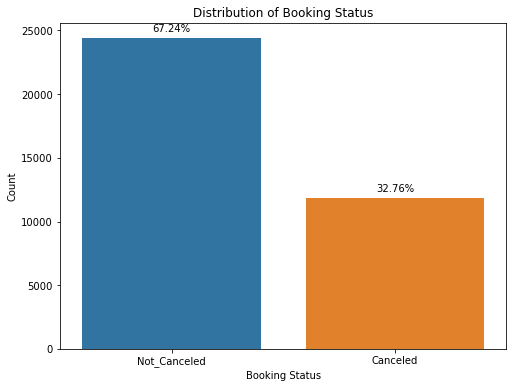

Booking Status Counts:
booking_status
Not_Canceled    24390
Canceled        11885
Name: count, dtype: int64


In [12]:
# Booking Status

# Count the number of occurrences for each booking status (Canceled and Not_Canceled)
status_counts = data['booking_status'].value_counts()

# Calculate the percentage of each booking status
status_percentages = (status_counts / len(data)) * 100
# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x=status_counts.index, y=status_counts.values)
plt.title('Distribution of Booking Status')
plt.xlabel('Booking Status')
plt.ylabel('Count')

# Annotate the bars with the percentage values
for index, value in enumerate(status_counts.values):
    plt.text(index, value + 500, f'{status_percentages[index]:.2f}%', ha='center', color='black')

plt.show()

# Print counts and percentages
print("Booking Status Counts:")
print(status_counts)

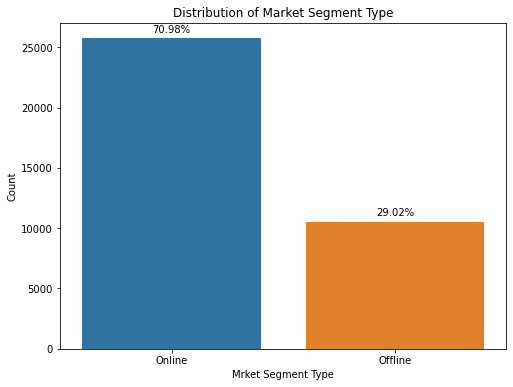

Market Segment Type Counts:
market_segment_type
Online     25747
Offline    10528
Name: count, dtype: int64


In [13]:
# Market Segment Type

# Count the number of occurrences for each market_segment_type (Offline and Online)
segment_counts = data['market_segment_type'].value_counts()

# Calculate the percentage of each booking status
segment_percentages = (segment_counts / len(data)) * 100
# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x=segment_counts.index, y=segment_counts.values)
plt.title('Distribution of Market Segment Type')
plt.xlabel('Mrket Segment Type')
plt.ylabel('Count')

# Annotate the bars with the percentage values
for index, value in enumerate(segment_counts.values):
    plt.text(index, value + 500, f'{segment_percentages[index]:.2f}%', ha='center', color='black')

plt.show()

# Print counts and percentages
print("Market Segment Type Counts:")
print(segment_counts)

The majority of the bookings are made through the online market segment, accounting for approximately 70.99% of the total bookings. This suggests a strong preference or reliance on online booking platforms by customers.

---

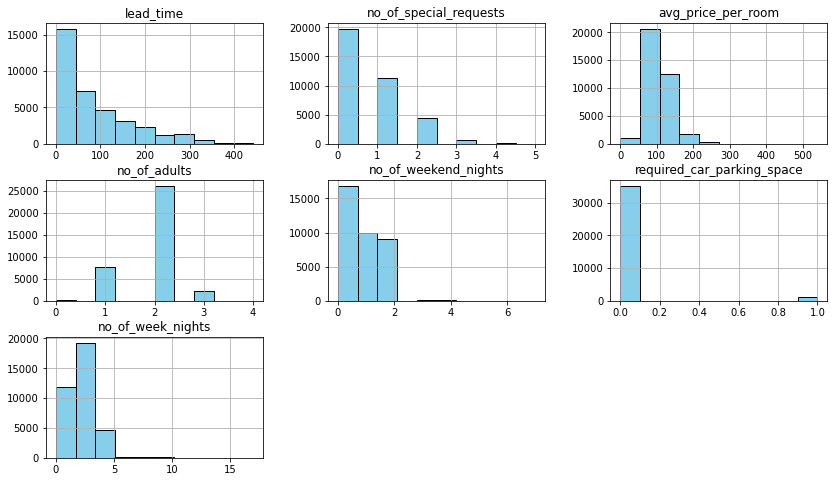

In [14]:
# Create a histogram for each numeric column in the dataframe
data.hist(figsize=(14, 8), edgecolor='black',color='skyblue')
plt.show()

---

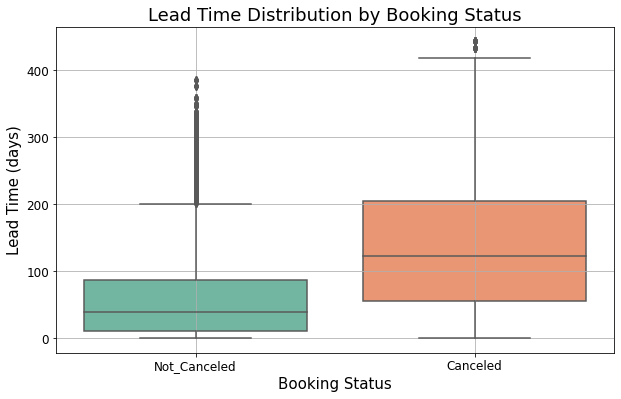

In [15]:
# Visualizing the relationship between lead time and booking cancellation
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x="booking_status", y="lead_time", palette="Set2")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Booking Status', fontsize=15)
plt.ylabel('Lead Time (days)', fontsize=15)
plt.title('Lead Time Distribution by Booking Status', fontsize=18)
plt.grid(True)
plt.show()

- The median lead time for bookings that were canceled is longer compared to those that were not canceled. This indicates that customers who book further in advance are more likely to cancel their reservations.
- The median lead time for not canceled bookings is shorter, suggesting that last-minute bookings are more prone to no cancellations.

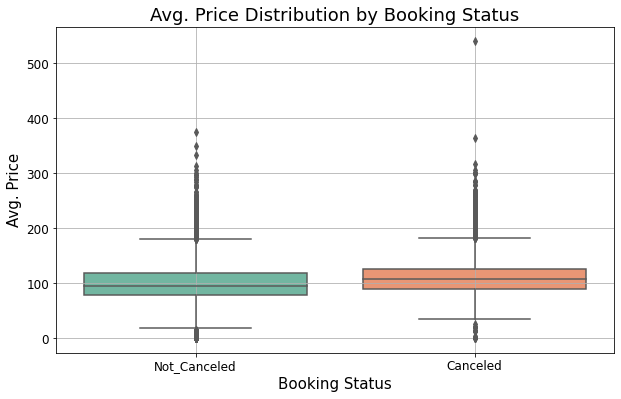

In [16]:
# Visualizing the relationship between avg. price and booking cancellation
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x="booking_status", y="avg_price_per_room", palette="Set2")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Booking Status', fontsize=15)
plt.ylabel('Avg. Price', fontsize=15)
plt.title('Avg. Price Distribution by Booking Status', fontsize=18)
plt.grid(True)
plt.show()

- The median average price for bookings that are canceled is slightly higher compared to the not canceled bookings. This suggests that customers are more likely to cancel reservations when they perceive the price as being on the higher end.

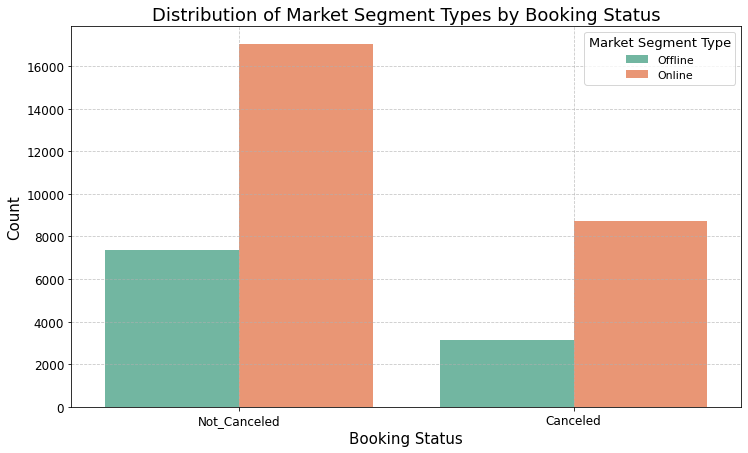

In [17]:
# Visualizing the relationship between market segment type and booking cancellation
plt.figure(figsize=(12, 7))
sns.countplot(data=data, x="booking_status", hue="market_segment_type", palette="Set2")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Booking Status', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Distribution of Market Segment Types by Booking Status', fontsize=18)
plt.legend(title='Market Segment Type', title_fontsize='13', fontsize='11')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

- Online bookings are more likely to cancel compared to offline bookings, and offline bookings have a lower cancellation rate.
- Of all cancellations, 73.47% are from online bookings and 26.53% of cancellations are from offline bookings.

In [18]:
# Convert the 'arrival_date' column to datetime type
data['arrival_date'] = pd.to_datetime(data['arrival_date'])

# Extract month from 'arrival_date'
data['arrival_month'] = data['arrival_date'].dt.month

In [19]:
data.head()

,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,arrival_date,required_car_parking_space,no_of_week_nights,booking_status,arrival_month
0,224,Offline,0,65.00,2,1,2017-10-02,0,2,Not_Canceled,10
1,5,Online,1,106.68,2,2,2018-11-06,0,3,Not_Canceled,11
2,1,Online,0,60.00,1,2,2018-02-28,0,1,Canceled,2
3,211,Online,0,100.00,2,0,2018-05-20,0,2,Canceled,5
4,48,Online,0,94.50,2,1,2018-04-11,0,1,Canceled,4


In [20]:
# Count of bookings for each month and booking status
monthly_bookings = data.groupby(['arrival_month', 'booking_status']).size().unstack(fill_value=0)
# Sort by the number of canceled bookings
monthly_bookings_sorted = monthly_bookings.sort_values(by='Canceled', ascending=False)
monthly_bookings_sorted

booking_status,Canceled,Not_Canceled
arrival_month,,
10,1880,3437
9,1538,3073
8,1488,2325
7,1314,1606
6,1291,1912
4,995,1741
5,948,1650
11,875,2105
3,700,1658


- **October** has the highest number of canceled bookings (1880) compared to other months. It also has a relatively high number of not canceled bookings (3437), making it a month with significant booking activity.
- **January** shows the lowest cancellation count, suggesting it might be a quieter month for bookings, or that bookings in January are less likely to be canceled.
- **Summer and Autumn**: Both show higher numbers of cancellations compared to winter months, possibly due to increased travel plans and uncertainties during these periods.

More analysis:

In [21]:
monthly_bookings = data.groupby(['arrival_month', 'booking_status']).size().unstack(fill_value=0)

# Calculate cancellation rate
monthly_bookings['Cancellation_Rate'] = monthly_bookings['Canceled'] / (monthly_bookings['Canceled'] + monthly_bookings['Not_Canceled'])

monthly_bookings


booking_status,Canceled,Not_Canceled,Cancellation_Rate
arrival_month,,,
1,24,990,0.023669
2,430,1274,0.252347
3,700,1658,0.296862
4,995,1741,0.363670
5,948,1650,0.364896
6,1291,1912,0.403060
7,1314,1606,0.450000
8,1488,2325,0.390244
9,1538,3073,0.333550


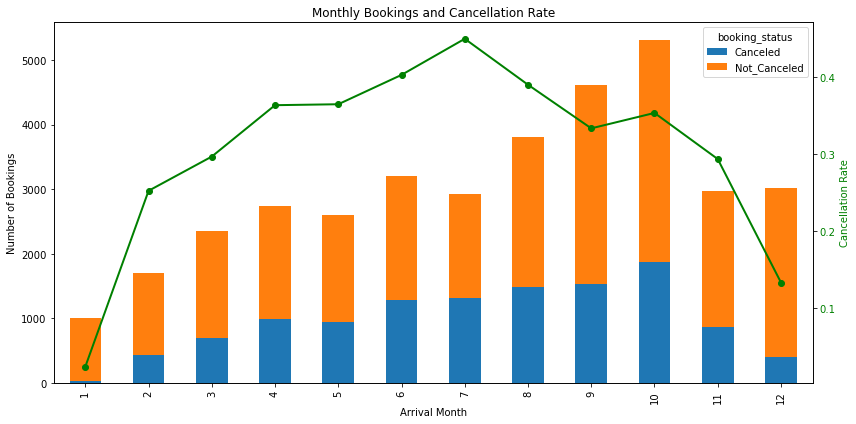

In [22]:
# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for Canceled and Not_Canceled
monthly_bookings[['Canceled', 'Not_Canceled']].plot(kind='bar', stacked=True, ax=ax1)
ax1.set_ylabel('Number of Bookings')
ax1.set_xlabel('Arrival Month')

# Line plot for Cancellation Rate
ax2 = ax1.twinx()
x = np.arange(len(monthly_bookings.index))  # the label locations
ax2.plot(x, monthly_bookings['Cancellation_Rate'], color='green', marker='o', linestyle='-', linewidth=2)
ax2.set_ylabel('Cancellation Rate', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Set x-axis ticks
ax1.set_xticks(x)
ax1.set_xticklabels(monthly_bookings.index)

plt.title('Monthly Bookings and Cancellation Rate')
plt.tight_layout()
plt.show()

After more analysis, **July** has the highest cancellation rate.

---

## **Summary**

### **Key Insights**
- **Lead Time**: Longer lead times correlate with higher cancellation rates.
- **Price Sensitivity**: Higher average room prices are linked to higher cancellation rates.
- **Market Segment**: Online bookings are more prone to cancellations than offline bookings.
- **Seasonal Trends**: Summer and autumn months see higher cancellations, likely due to increased travel activities and uncertainties.

This EDA provides a comprehensive overview of booking behaviors, cancellation trends, and market segment dynamics, offering valuable insights for optimizing booking strategies and reducing cancellation rates.